##Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
ga_hits = pd.read_csv('H:/Мой диск/ga_hits.csv')

In [3]:
ga_sessions = pd.read_csv('H:/Мой диск/ga_sessions.csv')

C:\Users\андрей\AppData\Local\Temp\ipykernel_980\995622212.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  ga_sessions = pd.read_csv('H:/Мой диск/ga_sessions.csv')


In [4]:
import pickle as pkl
pkl.dump(ga_hits, open('ga_hits.pkl', 'wb'))
pkl.dump(ga_sessions, open('ga_sessions.pkl', 'wb'))
#


In [5]:
df = pd.merge(ga_hits, ga_sessions, on='session_id', how='inner')

In [6]:
df.describe()

,hit_time,hit_number,event_value,visit_number
count,6.525016e+06,1.568522e+07,0.0,1.568522e+07
mean,2.042751e+05,2.347792e+01,NaN,2.696941e+00
std,3.785350e+05,2.861302e+01,NaN,1.254170e+01
min,0.000000e+00,1.000000e+00,NaN,1.000000e+00
25%,2.416700e+04,7.000000e+00,NaN,1.000000e+00
50%,8.973300e+04,1.500000e+01,NaN,1.000000e+00
75%,2.181740e+05,2.900000e+01,NaN,2.000000e+00
max,1.315688e+07,5.000000e+02,NaN,5.640000e+02


In [7]:
df.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,...,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,...,NaN,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,NaN,360x780,Chrome,Russia,Saint Petersburg
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,...,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,...,NaN,JajANoFxoqXfKRNBUhzx,desktop,Windows,NaN,NaN,2560x1080,Chrome,Russia,Moscow
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,...,NaN,zXjuoqEaPElBnwpSHMpx,mobile,Android,Samsung,NaN,412x915,Chrome,Russia,Podolsk
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,...,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,NaN,NaN,1536x864,Chrome,Estonia,Tallinn


In [8]:
df['event_action'].value_counts()


event_action
view_card                     3546622
view_new_card                 3539687
sub_landing                   1796528
go_to_car_card                 972151
sub_view_cars_click            791042
                               ...   
click_on_android                    1
new_year_road_help_btn              1
titul_page_view                     1
show_pos_status_declined            1
survey_buy_after_sell_when          1
Name: count, Length: 230, dtype: int64

In [9]:
numerical_cols = df.select_dtypes(include='number').columns.tolist()
df_num = df[numerical_cols]

In [10]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
df_cat = df[categorical_cols].astype(str)

In [11]:
df.dtypes

session_id                   object
hit_date                     object
hit_time                    float64
hit_number                    int64
hit_type                     object
hit_referer                  object
hit_page_path                object
event_category               object
event_action                 object
event_label                  object
event_value                 float64
client_id                    object
visit_date                   object
visit_time                   object
visit_number                  int64
utm_source                   object
utm_medium                   object
utm_campaign                 object
utm_adcontent                object
utm_keyword                  object
device_category              object
device_os                    object
device_brand                 object
device_model                 object
device_screen_resolution     object
device_browser               object
geo_country                  object
geo_city                    

In [12]:
df['hit_date']= pd.to_datetime(df['hit_date'])
df['visit_time'] = pd.to_datetime(df['visit_time'])
df['hit_time' ]= pd.to_datetime(df['hit_time'])
df['visit_date'] = pd.to_datetime(df['visit_date'])

C:\Users\андрей\AppData\Local\Temp\ipykernel_980\2827334849.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['visit_time'] = pd.to_datetime(df['visit_time'])


In [13]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))
df.drop(df[outliers.any(axis=1)].index, inplace=True)
print(df.shape)

c:\Users\андрей\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
c:\Users\андрей\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


(13021475, 28)


In [14]:
df = df.drop(columns = ['hit_date', 'hit_time', 'visit_time', 'visit_date'])

<Axes: >

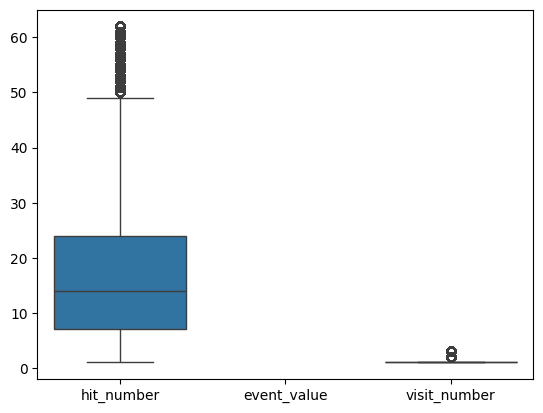

In [15]:
sns.boxplot(data=df)

In [15]:
df.head()

,session_id,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value,client_id,...,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
10,1945627655676404094.1640276355.1640276355,4,event,NaN,sberauto.com/cars/all/porsche/911/f149c91b?ren...,card_web,view_card,NaN,NaN,453001739.1640276350,...,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,2000x2000,Safari,United States,Forest City
11,4555345648396008371.1640233907.1640233907,4,event,trXmoxcphNjuYcShOXwL,sberauto.com/cars/all/nissan/qashqai/bfc21661?...,card_web,view_card,NaN,NaN,1060624059.164023,...,NaN,NaN,mobile,iOS,Apple,NaN,2000x2000,Safari,United States,Prineville
12,5636135307570360848.1640280592.1640280592,3,event,NaN,sberauto.com/cars/all/renault/duster/145d53f1?...,card_web,view_card,NaN,NaN,1312265011.164028,...,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x812,YaBrowser,Russia,Moscow
13,6993187768713388524.1640276467.1640276467,4,event,NaN,sberauto.com/cars/all/porsche/911/f149c91b?ren...,card_web,view_card,NaN,NaN,1628228409.164028,...,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Linux,NaN,NaN,2000x2000,Chrome,United States,Prineville
14,9063469723165129646.1640233902.1640233902,3,event,uMnMdxLOIznakHyXLoMC,sberauto.com/cars/all/skoda/rapid/bf24b977?ren...,card_web,view_card,NaN,NaN,2110253489.164024,...,NaN,NaN,tablet,Android,Google,NaN,360x480,Chrome,United States,Prineville


In [16]:
df['target'] = df['event_value'].fillna(0).astype(int)
if df['target'].nunique() == 1:
    df.loc[df.sample(frac=0.01, random_state=42).index, 'target'] = 1
def extract_last_event_features(df):
    features = []

    for session_id, group in df.groupby('session_id'):
        group_sorted = group.sort_values('hit_number')
        if (group_sorted['target'] == 1).any():
            row = group_sorted[group_sorted['target'] == 1].iloc[-1]
        else:
            row = group_sorted.iloc[-1]

        features.append({
            'session_id': session_id,
            'target': int((group_sorted['target'] == 1).any()),
            'last_event_action': row['event_action'],
            'last_hit_page_path': row['hit_page_path'],
            'last_hit_number': row['hit_number'],
        })

    return pd.DataFrame(features)
df_features = extract_last_event_features(df)


In [17]:
df_first = df.sort_values('hit_number').groupby('session_id').first().reset_index()

df_merged = df_features.merge(
    df_first[['session_id', 'utm_source', 'utm_medium', 'utm_campaign',
              'utm_adcontent', 'utm_keyword', 'device_category',
              'device_os', 'device_brand', 'device_model',
              'device_screen_resolution', 'device_browser',
              'geo_country', 'geo_city']],
    on='session_id', how='left'
)




In [18]:
df.nunique().sort_values()

event_value                       0
hit_type                          1
target                            2
visit_number                      3
device_category                   3
device_os                        13
utm_medium                       45
event_category                   49
device_browser                   55
hit_number                       62
device_model                    104
geo_country                     156
device_brand                    200
event_action                    212
utm_source                      250
utm_adcontent                   268
utm_campaign                    374
utm_keyword                    1157
geo_city                       2363
device_screen_resolution       4911
hit_referer                   33258
event_label                   35714
hit_page_path                301251
client_id                   1315864
session_id                  1581628
dtype: int64

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import dill

# Разделяем данные на train/test
X = df_merged.drop(columns=['session_id', 'target'])
y = df_merged['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определяем признаки
cat_features = X.select_dtypes(include='object').columns.tolist()
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Предобработка
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='mean'), num_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
    ]), cat_features)
])

# Сборка pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Обучаем модель
pipe.fit(X_train, y_train)

# Предсказание и accuracy
y_pred = pipe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"{accuracy:.4f}")

# Сохраняем модель
artifact = {'model': pipe}
with open('H:/Мой диск/pipe.pkl', 'wb') as f:
    dill.dump(artifact, f)


c:\Users\андрей\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7737


In [ ]:
feature_names = X.columns.tolist()
print(feature_names)


['last_event_action', 'last_hit_page_path', 'last_hit_number', 'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 'utm_keyword', 'device_category', 'device_os', 'device_brand', 'device_model', 'device_screen_resolution', 'device_browser', 'geo_country', 'geo_city']


In [30]:
X.dtypes

last_event_action           object
last_hit_page_path          object
last_hit_number              int64
utm_source                  object
utm_medium                  object
utm_campaign                object
utm_adcontent               object
utm_keyword                 object
device_category             object
device_os                   object
device_brand                object
device_model                object
device_screen_resolution    object
device_browser              object
geo_country                 object
geo_city                    object
dtype: object

In [28]:
import pickle

with open('ga_hits.pkl', 'rb') as f:
    obj = pickle.load(f)
with open('ga_sessions.pkl', 'rb') as fin:
    obj = pickle.load(fin)

print(type(obj))
import pickle as pkl
pkl.dump(ga_hits, open('ga_hits.pkl', 'wb'))
pkl.dump(ga_sessions, open('ga_sessions.pkl', 'wb'))

<class 'pandas.core.frame.DataFrame'>
